Customer loyalty program data from Northern Lights Air (NLA), a fictitious airline based in Canada. In an effort to improve program enrollment, NLA ran a promotion between Feb - Apr 2018. Dataset includes loyalty program signups, enrollment and cancellation details, and additional customer information.

Recommended Analysis
What impact did the campaign have on loyalty program memberships (gross / net)?

Was the campaign adoption more successful for certain demographics of loyalty members?

What impact did the campaign have on booked flights during summer?

(Source: IBM Cognos Analytics)

(License: Public Domain)

Dataset downloaded from Maven Analytics

In [30]:
import pandas as pd

In [31]:
cfa=pd.read_csv('Customer Flight Activity.csv')

In [32]:
cfa.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [8]:
cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [9]:
cfa.duplicated().sum()

1922

In [13]:
cfa[cfa.duplicated()==True].sort_values(by=['Loyalty Number','Year','Month'])

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
177038,101902,2017,1,0,0,0.0,0,0
187057,101902,2017,2,0,0,0.0,0,0
196870,101902,2017,3,0,0,0.0,0,0
234038,101902,2017,7,0,0,0.0,0,0
278722,101902,2017,12,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...
233936,992168,2017,6,0,0,0.0,0,0
260584,992168,2017,9,0,0,0.0,0,0
338216,992168,2018,6,0,0,0.0,0,0
362095,992168,2018,9,0,0,0.0,0,0


In [33]:
cfa.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000
mean,550527.519034,2017.513661,6.513661,1.294888,1941.440201,2027.172345,31.304263,5.635661
std,258604.580187,0.499814,3.445428,1.962675,3239.975889,3872.139841,126.653775,22.801167
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327688.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551833.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772194.000000,2018.000000,10.000000,2.000000,3018.000000,3039.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


In [14]:
clh=pd.read_csv('Customer Loyalty History.csv')

In [15]:
clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [16]:
clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [18]:
clh.duplicated().sum()

0

In [19]:
clh.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


What impact did the campaign have on loyalty program memberships (gross / net)?

In [43]:
clh['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [45]:
df=clh[(clh['Enrollment Year']==2018) & (clh['Enrollment Month']>=2) & (clh['Enrollment Month']<=4) & (clh['Enrollment Type']=='2018 Promotion')]

In [46]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
18,172755,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5303.76,2018 Promotion,2018,3,NaN,NaN
36,938981,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,NaN,Single,Aurora,5337.35,2018 Promotion,2018,4,NaN,NaN
65,386082,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,30486.0,Divorced,Aurora,5391.97,2018 Promotion,2018,3,2018.0,11.0
69,112522,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,49846.0,Married,Aurora,5636.74,2018 Promotion,2018,2,NaN,NaN
73,330694,Canada,Alberta,Edmonton,T3G 6Y6,Female,Bachelor,105053.0,Married,Aurora,6172.91,2018 Promotion,2018,2,NaN,NaN


In [49]:

print('promotions time loyalty enrollments')
df['Loyalty Number'].nunique()

promotions time loyalty enrollments


971

In [83]:
df1=clh[(clh['Enrollment Type']=='Standard') & (clh['Enrollment Year']==2018) & ((clh['Enrollment Month']<2) | (clh['Enrollment Month']>4)) & (clh['Enrollment Month']!=0)]

In [84]:
print('Non promotions time loyalty enrollments')
df1['Loyalty Number'].nunique()

Non promotions time loyalty enrollments


2039

In [73]:
df2=clh[clh['Enrollment Year']==2018].groupby('Enrollment Month')['Loyalty Number'].nunique().reset_index(name='Enrollments')

In [74]:
df2.sort_values(['Enrollment Month'],ascending=True,inplace=True)

In [75]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Enrollments')

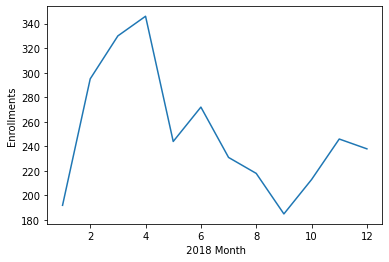

In [78]:
plt.plot('Enrollment Month','Enrollments',data=df2)
plt.xlabel(' 2018 Month')
plt.ylabel('Enrollments')

Month wise enrollments are higher during promotions period than the rest of the year


Total enrollments are higher for rest of year than during promotions

In [90]:
print('percentage of Enrollments through Promotion')
round((clh[clh['Enrollment Year']==2018]['Loyalty Number'].nunique()/clh['Loyalty Number'].nunique())*100,2)

percentage of Enrollments through Promotion


17.98

Was the campaign adoption more successful for certain demographics of loyalty members?

In [124]:
df3.describe(include='object')

,Gender,Education
count,10,10
unique,2,5
top,Female,Bachelor
freq,5,2


In [113]:
df3=df.groupby(['Gender','Marital Status'])['Loyalty Number'].nunique().reset_index(name='Loyalty Number Count')

In [114]:
df3

,Gender,Marital Status,Loyalty Number Count
0,Female,Divorced,77
1,Female,Married,289
2,Female,Single,128
3,Male,Divorced,78
4,Male,Married,269
5,Male,Single,130


In [115]:
df3.sort_values(['Gender','Marital Status','Loyalty Number Count'],ascending=[True,True,False],inplace=True)

In [116]:
df3

,Gender,Marital Status,Loyalty Number Count
0,Female,Divorced,77
1,Female,Married,289
2,Female,Single,128
3,Male,Divorced,78
4,Male,Married,269
5,Male,Single,130


May be married people want to avail financial and group benifits that come with enrolling in loyalty program during promotion period and hence their numbers are high

df3.describe(include='object')

In [117]:
df3=df.groupby(['Gender','Education'])['Loyalty Number'].nunique().reset_index(name='Loyalty Number Count')

In [118]:
df3.sort_values(['Gender','Education','Loyalty Number Count'],ascending=[True,True,False],inplace=True)

In [119]:
df3

,Gender,Education,Loyalty Number Count
0,Female,Bachelor,320
1,Female,College,122
2,Female,Doctor,17
3,Female,High School or Below,21
4,Female,Master,14
5,Male,Bachelor,312
6,Male,College,116
7,Male,Doctor,15
8,Male,High School or Below,29
9,Male,Master,5


May be people with Bachelors degree or college degree have tasted independence in terms of living and finances for the first time and want to embrace the Promotional Loyalty Enrollment to explore the same on their own without any dependencies hence the hight numbers in their case

In [125]:
df3=df.groupby(['Gender','Education','Marital Status'])['Loyalty Number'].nunique().reset_index(name='Loyalty Number Count')

In [126]:
df3.sort_values(['Gender','Education','Marital Status','Loyalty Number Count'],ascending=[True,True,True,False],inplace=True)

In [127]:
df3

,Gender,Education,Marital Status,Loyalty Number Count
0,Female,Bachelor,Divorced,49
1,Female,Bachelor,Married,219
2,Female,Bachelor,Single,52
3,Female,College,Divorced,12
4,Female,College,Married,43
5,Female,College,Single,67
6,Female,Doctor,Divorced,3
7,Female,Doctor,Married,12
8,Female,Doctor,Single,2
9,Female,High School or Below,Divorced,4


People with Bachelors degree or college degree have tasted independence in terms of living and finances for the first time and want to embrace the Promotional Loyalty Enrollment to explore the same on their own without any dependencies,also they want to avail the finalcial and group benifits that come with the offer hence the numbers are high in case of Married Educated people across genders.

What impact did the campaign have on booked flights during summer?


In [151]:
cfa1=cfa[cfa['Year']==2018][['Loyalty Number','Month','Total Flights']]

In [164]:
m=pd.merge(df,cfa1,on='Loyalty Number',how='inner')

In [165]:
m[m.duplicated()==True]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Month,Total Flights
3518,727091,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,Bachelor,24287.0,Divorced,Aurora,33473.35,2018 Promotion,2018,3,2018.0,11.0,2,0
3520,727091,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,Bachelor,24287.0,Divorced,Aurora,33473.35,2018 Promotion,2018,3,2018.0,11.0,3,0
3522,727091,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,Bachelor,24287.0,Divorced,Aurora,33473.35,2018 Promotion,2018,3,2018.0,11.0,4,0
3530,727091,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,Bachelor,24287.0,Divorced,Aurora,33473.35,2018 Promotion,2018,3,2018.0,11.0,12,0
5043,951353,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,82152.0,Married,Aurora,5600.50,2018 Promotion,2018,3,NaN,NaN,7,4
5049,951353,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,82152.0,Married,Aurora,5600.50,2018 Promotion,2018,3,NaN,NaN,2,0
5051,951353,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,82152.0,Married,Aurora,5600.50,2018 Promotion,2018,3,NaN,NaN,3,0
5054,951353,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,82152.0,Married,Aurora,5600.50,2018 Promotion,2018,3,NaN,NaN,5,0
8348,486860,Canada,Quebec,Montreal,H2T 2J6,Male,College,NaN,Single,Aurora,6393.87,2018 Promotion,2018,2,NaN,NaN,2,0
8351,486860,Canada,Quebec,Montreal,H2T 2J6,Male,College,NaN,Single,Aurora,6393.87,2018 Promotion,2018,2,NaN,NaN,4,0


In [166]:
m=m.drop_duplicates()

In [167]:
m.groupby('Month')['Total Flights'].sum().reset_index(name='Total Booked Flights')

,Month,Total Booked Flights
0,2,389
1,3,846
2,4,921
3,5,6224
4,6,8104
5,7,8452
6,8,7460
7,9,2712
8,10,2580
9,11,2294


There is consistent bookings of flights from start of promotion till the year end of 2018 at some period by the people who enrolled in loyalt through promotional time.
In Canda during the Summer time from July to September we see an higher flight booking from July which decreses as summer comes to end by some people who enrolled in the loyalty program through promotion.